# How to vis?

> 동적인건 Dash, 정적인건 seaborn

### Data

In [1]:
import pandas as pd
import numpy as np


red_wine   = pd.read_csv('winequality-red.csv',   sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

wines = pd.concat([red_wine, white_wine], axis=0,)
wines = wines.sample(frac=1.0, random_state=42).reset_index(drop=True)

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white


In [2]:
n_samples = 300
_x_mu, _x_sig = 120, 0.1
_y_mu, _y_sig = 26, 0.2
_z_mu, _z_sig = 0.2, 1

_x = _x_mu + _x_sig * np.random.randn(n_samples)
_y = _y_mu + _y_sig * np.random.randn(n_samples)
_z = _z_mu + _z_sig * np.random.randn(n_samples)
df_normal = pd.DataFrame({'x': _x, 'y': _y, 'z': _z})
df_normal.head(10)

,x,y,z
0,120.045009,26.073251,-0.075635
1,119.809959,26.006371,0.708999
2,119.929427,26.168279,0.895602
3,120.130886,25.808145,0.682050
4,120.081177,26.063200,2.218967
5,119.858432,25.930619,-0.135404
6,119.929783,25.879043,1.015076
7,119.949862,25.965333,1.593708
8,119.839705,26.290883,-1.143481
9,119.947611,25.923949,0.301440


### matplotlib and seaborn

- ref : https://jovianlin.io/data-visualization-seaborn-part-3/

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

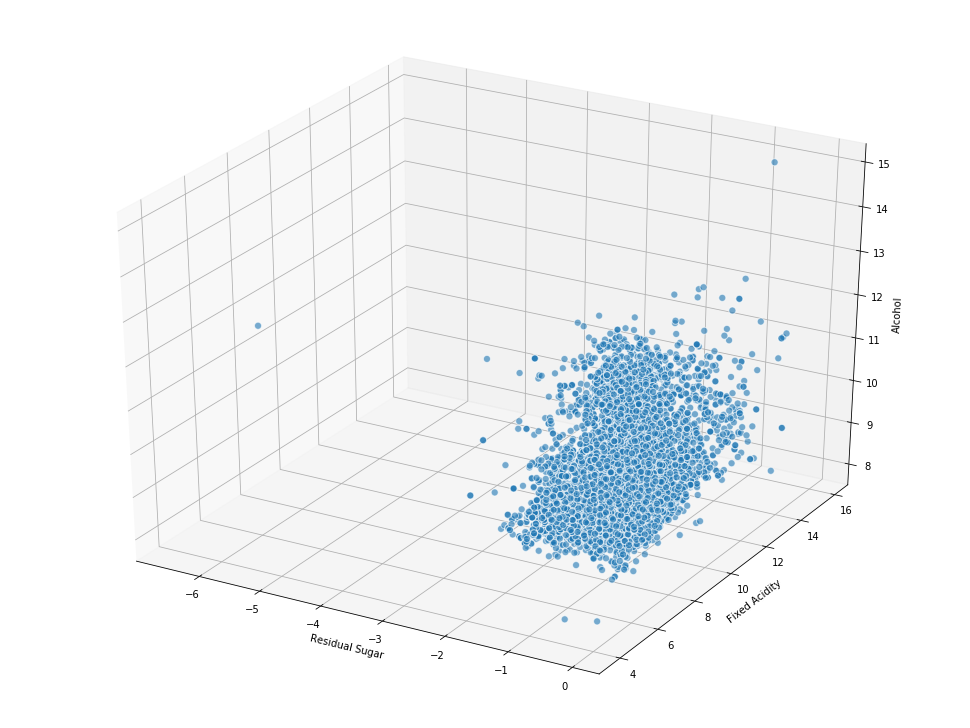

In [4]:
fig = plt.figure(figsize=(17, 13))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar'] * (-0.1)
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

plt.show()

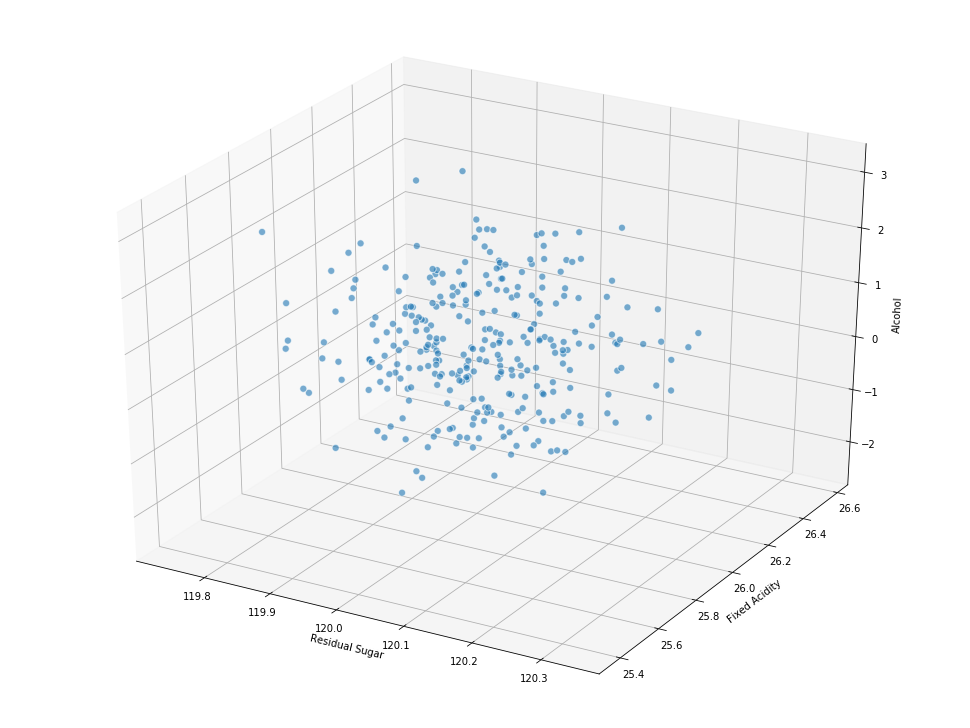

In [5]:
fig = plt.figure(figsize=(17, 13))
ax = fig.add_subplot(111, projection='3d')

xs = df_normal.x
ys = df_normal.y
zs = df_normal.z
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

plt.show()

Text(0.5,1.05,'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

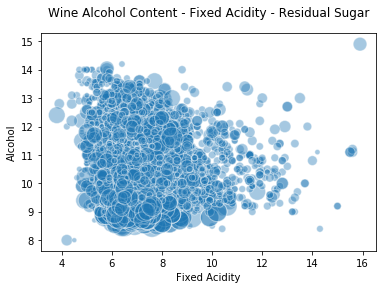

In [6]:
plt.scatter(x = wines['fixed acidity'], 
            y = wines['alcohol'], 
            s = wines['residual sugar']*25, # <== 😀 Look here!
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)

### Tableau

> - https://boraberan.wordpress.com/2015/12/18/going-3d-with-tableau/

### Plotly & Dash

###### t-SNE Explorer
> - https://github.com/plotly/dash-tsne

###### Plotly and Dash reference
> - Dash camera control
 - https://plot.ly/python/3d-camera-controls/
 - https://community.plot.ly/t/how-to-save-current-zoom-and-position-after-filtering/5310
- 3d axes formatting
 - https://plot.ly/python/3d-axes/#ticks-formatting

In [86]:
d1 = {'a':1}
d2 = {'b':2, 'a':2}

In [85]:
dict(**d1, **d2)

TypeError: type object got multiple values for keyword argument 'a'

In [91]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go


init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=df_normal.x, 
    y=df_normal.y, 
    z=df_normal.z,
    mode='markers',
    marker=dict(
        # color='rgb(204, 44, 44)',
        color=df_normal.z,
        colorscale='Viridis',
        
        size=2,
        symbol='circle',
        line=dict(
            color='rgba(154, 155, 129, 0.94)',
            width=0.9
        ),
        opacity=0.7
    )
)

axis_options = dict(
    title=None,
    nticks=10,
    backgroundcolor="rgb(242, 242, 242)",
    gridcolor="rgb(196, 196, 196)",
    showbackground=True,
    zerolinecolor="rgb(196, 196, 196)",
)

layout = go.Layout(
    scene=dict(
        xaxis = {
            **axis_options,
            'title':'XX',
            'range':[119,122],
            'nticks':10,
        },
        yaxis = {
            **axis_options,
            'range':[25, 27],
            'nticks':10,
        },
        zaxis = {
            **axis_options,
            'range':[-1, 1],
            'nticks':10,
        },
    ),
    # width=700,
    height=700,
    margin=dict(
        l=30,
        r=30,
        b=30,
        t=30
    )
)

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

# iplot(data=[trace1])
# plot([trace1])


In [86]:
d = {'a':1}

In [87]:
d.get('b')